# Expectation value of an Operator

$$ E = \langle \psi |O|\psi\rangle$$

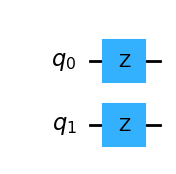

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

circuit = QuantumCircuit(2)
circuit.z(0)
circuit.z(1)
#op = CircuitOp(circuit)
circuit.draw(style='iqx',output='mpl')

In [13]:
from qiskit.quantum_info import Pauli, SparsePauliOp

X = Pauli('X')
Y = Pauli('Y')
Z = Pauli('Z')
I = Pauli('I')
operator = SparsePauliOp(["II", "IZ", "ZI","ZZ","XX" ], coeffs = [-1.052373245772859, 0.39793742484318045,-0.39793742484318045,
                                                                  -0.01128010425623538,0.18093119978423156 ])
#op = (-1.052373245772859 * I^I) + (0.39793742484318045 * I^Z) +
# (-0.39793742484318045 * Z^I) + (-0.01128010425623538 * Z^Z) + 
#(0.18093119978423156 * X^X)

print(operator)

SparsePauliOp(['II', 'IZ', 'ZI', 'ZZ', 'XX'],
              coeffs=[-1.05237325+0.j,  0.39793742+0.j, -0.39793742+0.j, -0.0112801 +0.j,
  0.1809312 +0.j])


The state with respect to which we want to find the expectation value

In [16]:
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.primitives import Estimator
psi = QuantumCircuit(2)
psi.x(0)
psi.x(1)
estimator = Estimator()
#psi = Statevector(psi)
expectation_value = estimator.run(psi, operator).result().values.real


Doing the matrix Multiplication

In [17]:
print(expectation_value)

[-1.06365335]


## Decomposition of a Quantum Circuit 

based on [Constructing a virtual two-qubit gate by sampling
single-qubit operations](https://iopscience.iop.org/article/10.1088/1367-2630/abd7bc/pdf)

That shows how you can decompose a CZ gate into set of $6$ single qubit gates:

![alt-text](decompose.png)

Using this decomposition we get: 
$$ \begin{bmatrix}
                            1-i & 0 & 0 & 0 \\
                            0 & 1+i& 0 & 0 \\
                            0 & 0 & 1+i & 0 \\
                            0 & 0 & 0 & -1-i
                        \end{bmatrix}$$

In [23]:
import numpy as np

i = np.eye(2)

z = np.array([[1,0],[0,-1]])

t1  = 1/2*np.kron(1/np.sqrt(2)*(i+1j*z), 1/np.sqrt(2)*(i+1j*z))

t2  = 1/2*np.kron(1/np.sqrt(2)*(i-1j*z), 1/np.sqrt(2)*(i-1j*z))

t3 = 0
for a1 in [-1,1]:
   for a2 in [-1,1]:
       t3 += -1/2 *a1*a2*( np.kron((i+a1*z)/2, np.cos((a2+1)*np.pi/4)*i+1j*np.sin((a2+1)*np.pi/4)*z) + np.kron(np.cos((a1+1)*np.pi/4)*i+1j*np.sin((a1+1)*np.pi/4)*z, (i+a2*z)/2) )
t4 = t1+t2+t3
print(t1+t2+t3)

[[ 1.-1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+1.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.-1.j]]


whereas the matrix of CZ gate is:

$$ \begin{bmatrix}
                            1 & 0 & 0 & 0 \\
                            0 & 1& 0 & 0 \\
                            0 & 0 & 1 & 0 \\
                            0 & 0 & 0 & -1
                        \end{bmatrix}$$

Note that the paper itself mentions that equality holds when we consider the operations as quantum channels, which leads to the equal expectation values. So the channel representation of CZ gate and the decomposed one should be the same.

The channel representation of a quantum gate $U$ essentially correspinds to the action of a gate on the density matrix $\rho$, as in $S(U) = U \rho U^{\dagger}$, instead of it's action on the pure state wave function.

## CX Gate Decomposition

$$ CNOT = (\mathbb{1} \otimes H) CZ (\mathbb{1} \otimes H)$$



![alt-text](cx_decom.png)

In [6]:
import numpy as np

i = np.eye(2)

z = np.array([[1,0],[0,-1]])
x = np.array([[0,1],[1,0]])

t1  = 1/2*np.kron(1/np.sqrt(2)*(i+1j*z), 1/np.sqrt(2)*(i+1j*x))

t2  = 1/2*np.kron(1/np.sqrt(2)*(i-1j*z), 1/np.sqrt(2)*(i-1j*x))

t3 = 0
for a1 in [-1,1]:
   for a2 in [-1,1]:
       t3 += -1/2 *a1*a2*( np.kron((i+a1*z)/2, np.cos((a2+1)*np.pi/4)*i+1j*np.sin((a2+1)*np.pi/4)*x) + np.kron(np.cos((a1+1)*np.pi/4)*i+1j*np.sin((a1+1)*np.pi/4)*z, (i+a2*x)/2) )

print(t1+t2+t3)

[[ 1.00000000e+00+0.j  1.11022302e-16-1.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 1.11022302e-16-1.j  1.00000000e+00+0.j  0.00000000e+00+0.j
   0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -5.55111512e-17+0.j
   1.00000000e+00+1.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  1.00000000e+00+1.j
  -5.55111512e-17+0.j]]


This is coming out to be

$$ \begin{pmatrix}
 1 & -i & 0 & 0 \\
 -i & 1 & 0 & 0 \\
 0 & 0 & 0 & 1+i \\
 0 & 0 & 1+i & 0
 \end{pmatrix}$$

Where the actual CNOT matrix is :

$$\begin{pmatrix}
 1 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 \\
 0 & 0 & 0 & 1 \\
 0 & 0 & 1 & 0
 \end{pmatrix}$$

The point about this paper by Mitarai and Fujii is not to express a two-qubit gate as a linear combination of tensor products of single-qubit gates. In fact, for the sort of two-qubit gate they consider,$e^{i \theta A_1 \otimes A_2}$ with $A_1^2 = \mathbb{1}$ and $A_2^2 = \mathbb{1}$ there is one such trivial decomposition: 

$$ e^{i \theta A_1 \otimes A_2} = \cos \theta \; \mathbb{1} \otimes \mathbb{1} + i \sin \theta \; A_1 \otimes A_2 $$

The equalities do not refer to the $4 \times 4$ matrix representations of the two-qubit operations but rather to the expectation values computed with such two-qubit operations. Or, equivalently, in the words of one of the authors, `the equality holds when we consider the operations as quantum channels`.

## Superoperator Representation

In [28]:
import numpy as np

# Define Pauli Z matrix
Z = np.array([[1, 0],
              [0, -1]])

# Define computational basis states
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

# Construct the Choi matrix for CZ gate
J_CZ = 0.5 * (np.kron(ket0, np.eye(2)) + np.kron(ket1, Z))

# Define a sample density matrix for the control qubit
rho_control = np.array([[0.7, 0.3],
                        [0.3, 0.3]])

# Create the tensor product of the transposed density matrix and the identity matrix
rho_tensor_identity = np.kron(np.transpose(rho_control), np.eye(2))

# Apply the partial trace
result = np.trace(np.dot(J_CZ, rho_tensor_identity))

print("Choi matrix for CZ gate:")
print(J_CZ)
print("\nSample density matrix for control qubit:")
print(rho_control)
print("\nResult of CZ gate operation on the density matrix:")
print(result)


Choi matrix for CZ gate:
[[ 0.5  0.   0.5  0. ]
 [ 0.   0.5  0.  -0.5]]

Sample density matrix for control qubit:
[[0.7 0.3]
 [0.3 0.3]]

Result of CZ gate operation on the density matrix:
0.7


There's a difference between quantum gates and quantum channels:



A quantum gate is a unitary operator on a Hilbert space, where typically this Hilbert space is associated with a system of qubits. In the case of a single qubit a quantum gate is a $2×2$
unitary matrix, where $|0⟩$ and $|1⟩$ are the computational basis states. For example, the quantum NOT gate is the unitary matrix $X$ that maps $|0⟩↦|1⟩$ and $|1⟩→|0⟩$. Of course, unitary operators can act on superpositions (i.e. linear combinations) $α|0⟩+β|1⟩$ of these basis states, which is required to perform quantum computation. For systems of $n$ qubits, quantum gates are unitary matrices that act on the Hilbert space $C^{2^n}$.

Quantum channels are a little bit more complicated mathematically. A density matrix is a positive semi-definite matrix $ρ$ with $Tr(ρ)=1$.

Density matrices represent the information about a quantum state, i.e. the probabilities and outcomes of the state that can arise upon measurement. A quantum channel is a linear map that maps density matrices to density matrices by preserving the fundamental properties, such as the positivity and trace condition of the density matrix. However, any quantum channel must also have an additional property known as complete positivity to ensure that it is compatible with the other axioms of quantum mechanics. A quantum channel is a completely positive trace-preserving (CPTP) map.

Distinctions aside, in the context of physics, quantum gates and quantum channels arise from the unitary evolution of a quantum system according to the Schrodinger equation. The Hamiltonian (a mathematical object governing these dynamics via encoding the interactions of the quantum system) evolves in time, and the result is a unitary transformation of the quantum state of the system. Thus to enact a gate on a quantum computer, we find a Hamiltonian that we can evolve to produce the desired effect of the quantum gate. Although a quantum system evolves unitarily, perhaps we only have access to part of the whole system; in this case, the effect is not unitary on this portion of the system but is described by a quantum channel (i.e. a CPTP map). If the whole system is accessible, then the quantum channel is described by unitary conjugation (also called a unitary channel).

In [7]:
import qiskit.tools.jupyter
%qiskit_version_table